# Marketing Campaign Modeling Performance for Target Variable


Eric Myers



---

### Overview


The goal for this analysis is to understand the "Response" variable (our target variable) and how other variables impact Response. 

The Response variable tells us which customers eventually accepted the offer in the company's marketing campaigns.

In particular, we will look at these variables in the data:

```
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise 
Complain - 1 if customer complained in the last 2 years
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
Teenhome - number of teenagers in customer’s household
Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - amount spent on wine products in the last 2 years
MntGoldProds - amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalogue
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase
```


---

## Preprocessing

(A) Compare numerically the average (mean) values of the features for data in Response group 0 and Response group.

(B) What are three features that are most similar between the two groups?


In [105]:
import pandas, seaborn
df = pandas.read_csv('../Datasets/marketing_campaign.csv')

In [106]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Let's narrow down the variables for analysis

In [187]:

variables = [
    'Response',
    'Complain', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Income',
    'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
    'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency'
]
data = df[variables]

Let's see if there is any missing data.

In [188]:
data.isna().sum()

Response                0
Complain                0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Income                 24
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntSweetProducts        0
MntWines                0
MntGoldProds            0
NumDealsPurchases       0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebPurchases         0
NumWebVisitsMonth       0
Recency                 0
dtype: int64

In [189]:
data=data.dropna()

In [190]:
data.isna().sum()

Response               0
Complain               0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Income                 0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntSweetProducts       0
MntWines               0
MntGoldProds           0
NumDealsPurchases      0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebPurchases        0
NumWebVisitsMonth      0
Recency                0
dtype: int64

Now that we have removed missing data, let's compare by Response groups 0 and 1

In [182]:
data.groupby("Response").mean()

,Complain,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
Response,,,,,,,,,,,,,,,,
0,0.009444,0.462225,0.541448,50839.132767,34.980063,144.624344,24.216684,25.035152,269.104407,40.968520,2.323190,2.391920,5.736621,3.911857,5.320567,51.514690
1,0.008982,0.341317,0.305389,60209.675676,52.050898,294.353293,38.203593,38.634731,502.703593,61.446108,2.335329,4.203593,6.095808,5.071856,5.293413,35.383234


The three features that appear to be most similar are Complain, NumDealsPurchases, and NumWebVisitsMonth. The rest vary, depending on the feature. The Mnt features seem to vary the most.

However, this similarity is difficult to measure without rescaling the data. Let's rescale and compare again

In [191]:
from sklearn.preprocessing import MinMaxScaler
data = pandas.get_dummies(data,columns=['Education','Marital_Status'])
data_scaled = pandas.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)
data_scaled.sample(5)

,Response,Complain,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
2051,0.0,0.0,0.0,0.5,0.079498,0.046332,0.054493,0.020101,0.034351,0.251842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1205,0.0,0.0,0.0,0.0,0.100689,0.382239,0.292754,0.000000,0.114504,0.615539,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1143,1.0,0.0,0.5,0.5,0.066652,0.073359,0.064928,0.045226,0.053435,0.229069,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.111578,0.864865,0.320580,0.693467,0.087786,0.177495,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1917,0.0,0.0,0.0,0.5,0.111549,0.501931,0.107246,0.542714,0.145038,0.227729,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [192]:
data_scaled

,Response,Complain,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1.0,0.0,0.0,0.0,0.084832,0.664093,0.316522,0.442211,0.335878,0.425318,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.5,0.5,0.067095,0.007722,0.003478,0.005025,0.003817,0.007368,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.105097,0.428571,0.073623,0.246231,0.080153,0.285332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.5,0.0,0.037471,0.038610,0.011594,0.020101,0.011450,0.007368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.5,0.0,0.085065,0.177606,0.068406,0.216080,0.103053,0.115874,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.0,0.0,0.0,0.5,0.089472,0.162162,0.105507,0.216080,0.450382,0.474883,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2212,0.0,0.0,1.0,0.5,0.093669,0.000000,0.017391,0.000000,0.000000,0.271936,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2213,0.0,0.0,0.0,0.0,0.083092,0.123552,0.125797,0.241206,0.045802,0.608171,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2214,0.0,0.0,0.0,0.5,0.101536,0.308880,0.124058,0.150754,0.114504,0.286671,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
data_scaled.groupby("Response").mean()

,Complain,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Response,,,,,,,,,,,,,,,,,,,,,
0.0,0.009444,0.231112,0.270724,0.073855,0.135058,0.08384,0.121692,0.095191,0.180244,0.113173,...,0.164218,0.201994,0.000525,0.001049,0.096537,0.401889,0.196222,0.272823,0.030430,0.000525
1.0,0.008982,0.170659,0.152695,0.087948,0.200969,0.17064,0.191978,0.146900,0.336707,0.169741,...,0.170659,0.302395,0.002994,0.002994,0.143713,0.293413,0.317365,0.179641,0.056886,0.002994


In [120]:
df = data_scaled.groupby('Response').mean()

In [121]:
(df.loc[1.0]-df.loc[0.0]).abs().sort_values()

Complain                   0.000462
NumDealsPurchases          0.000809
NumWebVisitsMonth          0.001358
Marital_Status_Alone       0.001945
Marital_Status_YOLO        0.002469
Marital_Status_Absurd      0.002469
Education_Master           0.006440
Income                     0.014092
Education_Basic            0.021294
Marital_Status_Widow       0.026456
NumStorePurchases          0.027630
Education_2n Cycle         0.029095
NumWebPurchases            0.042963
Marital_Status_Divorced    0.047175
MntSweetProducts           0.051709
Education_Graduation       0.056453
MntGoldProds               0.056568
Kidhome                    0.060454
NumCatalogPurchases        0.064703
MntFishProducts            0.065911
MntFruits                  0.070286
MntMeatProducts            0.086799
Marital_Status_Together    0.093182
Education_PhD              0.100402
Marital_Status_Married     0.108476
Teenhome                   0.118029
Marital_Status_Single      0.121143
MntWines                   0

With rescaling, three most similar features are still Complain, NumDealsPurchases, and NumWebVisitsMonth

---

**Is there sufficient differences to keep these three variables for further analysis?**

Let's use visual analysis to compare

#### Analyzing Complain with Response Group

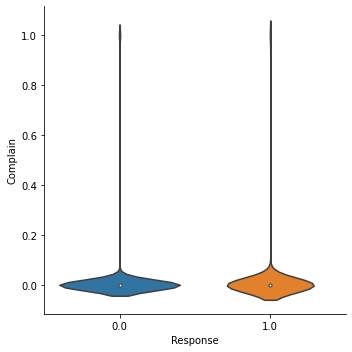

In [125]:
import seaborn
seaborn.catplot(data=data_scaled, x="Response", y="Complain", kind="violin")

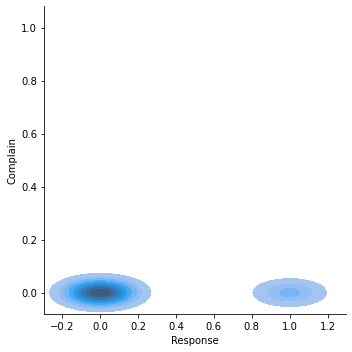

In [127]:
seaborn.displot(data=data_scaled, x='Response', y='Complain', kind='kde', fill=True)

There does not appear to be much difference between the two Response groups for the Complain variable. This variable may be okay to remove, as it will not give us much information for distingusing the two groups

#### Analyzing NumDealsPurchases for Response groups

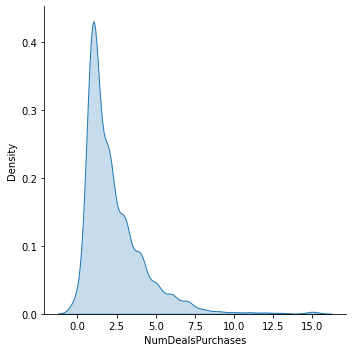

In [128]:
seaborn.displot(data=data, x="NumDealsPurchases", kind="kde", fill=True)

This looks like a fairly normal distribution. This might make it suitable for analysis

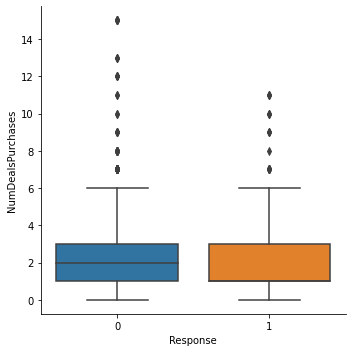

In [131]:
seaborn.catplot(data=data, x='Response', y='NumDealsPurchases', kind='box')

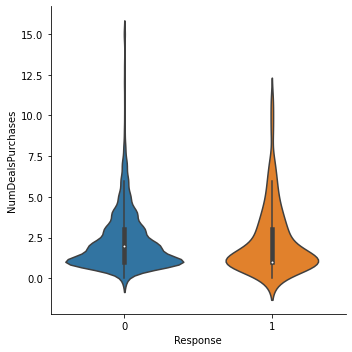

In [129]:
seaborn.catplot(data=data, x='Response', y='NumDealsPurchases', kind='violin')

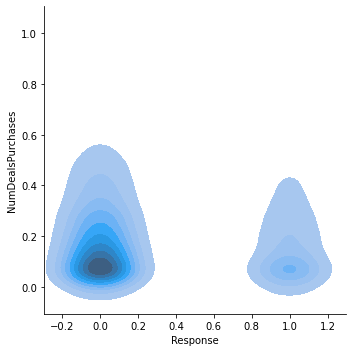

In [130]:
seaborn.displot(data=data_scaled, x='Response', y='NumDealsPurchases', kind='kde', fill=True)

There also seems to be more variation between the two groups for this variable. Because of this, we will keep it to use for further analysis.

#### Analyzing NumWebVisitsMonth for Response groups

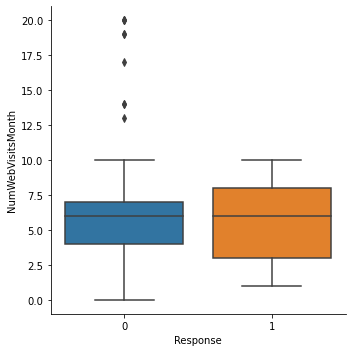

In [42]:
seaborn.catplot(data=data, x="Response", y="NumWebVisitsMonth", kind="box")

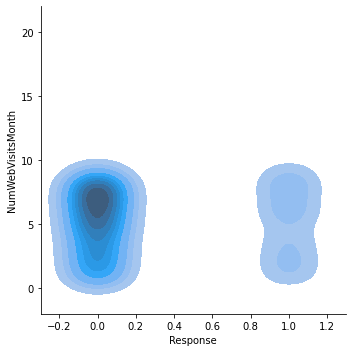

In [133]:
seaborn.displot(data=data, x="Response", y="NumWebVisitsMonth", kind="kde", fill=True)

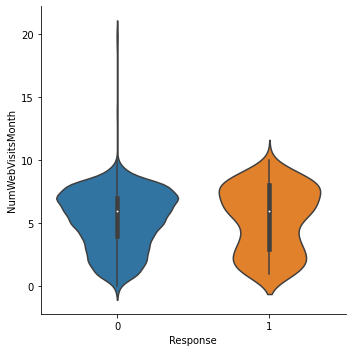

In [44]:
seaborn.catplot(data=data, x="Response", y="NumWebVisitsMonth", kind="violin")

The two Response groups differ more for NumWebVisitsMonth more than the other two variables, and visibly on their own, so we will also keep NumWebVisitsMonth 

Let's remove the Complain variable, as it will not give us much insight into the target variable

In [194]:
data_scaled=data_scaled.drop(columns=['Complain'])

In [195]:
data_scaled

,Response,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1.0,0.0,0.0,0.084832,0.664093,0.316522,0.442211,0.335878,0.425318,0.274143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.5,0.5,0.067095,0.007722,0.003478,0.005025,0.003817,0.007368,0.018692,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.105097,0.428571,0.073623,0.246231,0.080153,0.285332,0.130841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.5,0.0,0.037471,0.038610,0.011594,0.020101,0.011450,0.007368,0.015576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.5,0.0,0.085065,0.177606,0.068406,0.216080,0.103053,0.115874,0.046729,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.0,0.0,0.5,0.089472,0.162162,0.105507,0.216080,0.450382,0.474883,0.769470,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2212,0.0,1.0,0.5,0.093669,0.000000,0.017391,0.000000,0.000000,0.271936,0.024922,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2213,0.0,0.0,0.0,0.083092,0.123552,0.125797,0.241206,0.045802,0.608171,0.074766,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2214,0.0,0.0,0.5,0.101536,0.308880,0.124058,0.150754,0.114504,0.286671,0.190031,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---
**What are 5 variables that correlate most with Response, either positively or negatively?**


In [142]:
data.corr()["Response"].abs().sort_values().round(3)

NumDealsPurchases          0.002
NumWebVisitsMonth          0.004
Education_Master           0.006
Marital_Status_Alone       0.019
Marital_Status_Absurd      0.029
Marital_Status_YOLO        0.029
Education_2n Cycle         0.036
NumStorePurchases          0.039
Education_Graduation       0.040
Education_Basic            0.049
Marital_Status_Widow       0.052
Marital_Status_Divorced    0.055
Marital_Status_Together    0.076
Marital_Status_Married     0.079
Kidhome                    0.080
Education_PhD              0.087
Marital_Status_Single      0.105
MntFishProducts            0.111
MntSweetProducts           0.117
MntFruits                  0.125
Income                     0.133
MntGoldProds               0.140
NumWebPurchases            0.149
Teenhome                   0.154
Recency                    0.198
NumCatalogPurchases        0.221
MntMeatProducts            0.236
MntWines                   0.247
Response                   1.000
Name: Response, dtype: float64

The 5 variables that correlate most with Response in order are 
1. MntWines (0.247)
2. MntMeatProducts (0.236)
3. NumCatalogPurchases (0.221)
4. Recency (0.198)
5. Teenhome(0.154)

---

**Preparation for modeling**

We have removed our unwanted data and gotten rid of missing data. Let's define our X and Y groups for analysis

In [202]:

X = data_scaled.drop(columns=['Response'])
y = data['Response']

In [203]:
X

,Kidhome,Teenhome,Income,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,0.0,0.084832,0.664093,0.316522,0.442211,0.335878,0.425318,0.274143,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.5,0.067095,0.007722,0.003478,0.005025,0.003817,0.007368,0.018692,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.105097,0.428571,0.073623,0.246231,0.080153,0.285332,0.130841,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.0,0.037471,0.038610,0.011594,0.020101,0.011450,0.007368,0.015576,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.5,0.0,0.085065,0.177606,0.068406,0.216080,0.103053,0.115874,0.046729,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.0,0.5,0.089472,0.162162,0.105507,0.216080,0.450382,0.474883,0.769470,0.133333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2212,1.0,0.5,0.093669,0.000000,0.017391,0.000000,0.000000,0.271936,0.024922,0.466667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2213,0.0,0.0,0.083092,0.123552,0.125797,0.241206,0.045802,0.608171,0.074766,0.066667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2214,0.0,0.5,0.101536,0.308880,0.124058,0.150754,0.114504,0.286671,0.190031,0.133333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---

Now, we will choose the metrics for measuring performance of modelers.  If the data is balanced (in terms of Response), we will for with accuracy. This is simple and effective.  If the data is imbalanced, we should go with f1 and/or balanced_accuracy.



In [204]:
data['Response'].value_counts(1)

0    0.849729
1    0.150271
Name: Response, dtype: float64

Class 0 is 85%, and class 1 is 15%.  This dataset is imbalanced, so accuracy is not a good measure of prediction performance. Let's use f1 and balanced accuracy to measure instead

---

**Using KFold for cross validation to use for models**

In [215]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
repeated_sampler = RepeatedKFold(n_splits=10, n_repeats=10)
def validate(model):
    result = cross_validate(model, X, y, cv=repeated_sampler, scoring=['f1', 'balanced_accuracy'])
    print("f1 score: {0}, balanced_accuracy score: {1}".format(result['test_f1'].mean(), result['test_balanced_accuracy'].mean()))

---
#### KNearestNeighbor

Using KFold and to evaluate KNearestNeighbor classifier with default parameters


In [219]:
KNNmodel = KNeighborsClassifier()
validate(KNNmodel)

f1 score: 0.2629701299425503, balanced_accuracy score: 0.5748195652605834


---

#### Linear SVC

Using the same cross validator and  metrics to assess the performance of LinearSVC (with dual=False).

In [220]:
SVCmodel=LinearSVC(dual=False)
validate(SVCmodel)

f1 score: 0.29842236624327223, balanced_accuracy score: 0.5892062924339041


---

#### Dummy Classifier

Using the same cross validator and  metrics to assess the performance of <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html">DummyClassifier</a> with stratified strategy.

In [86]:
from sklearn.dummy import DummyClassifier
dumfmodel=DummyClassifier(strategy="stratified")

In [221]:
validate(dumfmodel)

f1 score: 0.14851169513548618, balanced_accuracy score: 0.5004322838373928


In [ ]:
ConcIt seems the KNN performs the best when classifying the data into groups based on the Response variable